# BANK LOAN ANALYSIS REPORT

### Import Libraries

In [2]:
# install requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

In [4]:
df = pd.read_excel(r"C:\Users\Administrator\Downloads\financial_loan.xlsx")

In [5]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,Column1
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009,NaN
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939,NaN
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522,NaN
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911,NaN
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835,NaN


In [6]:
df.tail()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment,Column1
38571,803452,NJ,INDIVIDUAL,< 1 year,Joseph M Sanzari Company,C,MORTGAGE,2021-07-11,2021-05-16,2021-05-16,...,60 months,Verified,100000.0,0.1986,551.64,0.1299,24250,33,31946,NaN
38572,970377,NY,INDIVIDUAL,8 years,Swat Fame,C,RENT,2021-10-11,2021-04-16,2021-05-16,...,60 months,Verified,50000.0,0.0458,579.72,0.1349,25200,18,31870,NaN
38573,875376,CA,INDIVIDUAL,5 years,Anaheim Regional Medical Center,D,RENT,2021-09-11,2021-05-16,2021-05-16,...,60 months,Verified,65000.0,0.1734,627.93,0.1749,25000,20,35721,NaN
38574,972997,NY,INDIVIDUAL,5 years,Brooklyn Radiology,D,RENT,2021-10-11,2021-05-16,2021-05-16,...,60 months,Verified,368000.0,0.0009,612.72,0.1825,24000,9,33677,NaN
38575,682952,NY,INDIVIDUAL,4 years,Allen Edmonds,F,RENT,2021-07-11,2021-05-16,2021-05-16,...,60 months,Verified,80000.0,0.0600,486.86,0.2099,18000,7,27679,NaN


#### Metadata of the data

In [7]:
count = df.shape[0]
print("No.of.Rows:",count)

No.of.Rows: 38576


In [8]:
count = df.shape[1]
print("No.of.Columns:",count)

No.of.Columns: 25


In [9]:
df.info


<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

In [10]:
df.columns

Index(['id', 'address_state', 'application_type', 'emp_length', 'emp_title',
       'grade', 'home_ownership', 'issue_date', 'last_credit_pull_date',
       'last_payment_date', 'loan_status', 'next_payment_date', 'member_id',
       'purpose', 'sub_grade', 'term', 'verification_status', 'annual_income',
       'dti', 'installment', 'int_rate', 'loan_amount', 'total_acc',
       'total_payment', 'Column1'],
      dtype='object')

#### Data Types

In [11]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
Column1                          object


#### Total Loan Applications

In [12]:
total_loan = df['id'].count()
print("Total Loan Applications:",total_loan)

Total Loan Applications: 38576


#### Month To Date(MTD)

In [13]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month 

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_appli = mtd_data['id'].count()

print(f"MTD LOAN APPLICATIONS (for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_appli}")

MTD LOAN APPLICATIONS (for December 2021): 4314


#### Total Funded Amount

In [14]:
tot_funded_amt = df['loan_amount'].sum()
tot_funded_amt_million = tot_funded_amt/1000000
print("Total_Funded_Amount: ${:.2f}M".format(tot_funded_amt_million))

Total_Funded_Amount: $435.76M


#### Total Amount Received

In [15]:
tot_amt_rec = df['total_payment'].sum()
tot_amt_rec_million = tot_amt_rec/1000000
print("Total Amount Received: ${:.2f}M".format (tot_amt_rec_million))

Total Amount Received: $473.07M


#### MTD TOTAL AMT RECEIVED

In [16]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month 

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

tot_amt_rec = mtd_data['total_payment'].sum()
tot_amt_rec_million = tot_amt_rec/1000000

print(f"MTD Total Amount Received(for {latest_issue_date.strftime('%B %Y')}): ${tot_amt_rec_million:.2f}M")

MTD Total Amount Received(for December 2021): $58.07M


#### AVG INTEREST RATE

In [17]:
avg_int_rate = df['int_rate'].mean()*100
print("Average Interest Rate:{:.2f}%".format(avg_int_rate))

Average Interest Rate:12.05%


#### Average Debt to Interest Ratio

In [18]:
avg_debt_income_ratio = df['dti'].mean()*100
print("Average Debt to Income Ratio:{:.2f}%".format(avg_debt_income_ratio))

Average Debt to Income Ratio:13.33%


#### GOOD LOAN METRICS

In [19]:
# good loan status
good_loans = df[df['loan_status'].isin(['Fully Paid','Current'])]

# total loan applications
total_loan_applications = df['id'].count()

# good loan applications
good_loan_applications = good_loans['id'].count()

# good loan percentage 
good_loan_percentage = (good_loan_applications / total_loan_applications) *100

# good laon funded amount
good_loan_tot_funded_amount = good_loans['loan_amount'].sum()
good_loan_tot_funded_amount_million = good_loan_tot_funded_amount/1000000

# good loan tot amt received
good_loan_tot_amt_received = good_loans['total_payment'].sum()
good_loan_tot_amt_received_million = good_loan_tot_amt_received/1000000

# print statements
print("Total Good Loan Applications:", good_loan_applications)
print("Percentage of Good Loan Applications:{:.2f}%".format(good_loan_percentage))
print("Good Loan Funded Amount(in millions):${:.2f}M".format(good_loan_tot_funded_amount_million))
print("Good Loan Received Amount(in millions):${:.2f}M".format(good_loan_tot_amt_received_million))

Total Good Loan Applications: 33243
Percentage of Good Loan Applications:86.18%
Good Loan Funded Amount(in millions):$370.22M
Good Loan Received Amount(in millions):$435.79M


#### BAD LOAN METRICS

In [20]:
# bad loan status
bad_loans = df[df['loan_status'].isin(['Charged Off'])]

# total loan applications
total_loan_applications = df['id'].count()

# bad loan applications
bad_loan_applications = bad_loans['id'].count()

# bad loan percentage 
bad_loan_percentage = (bad_loan_applications / total_loan_applications) *100

# bad laon funded amount
bad_loan_tot_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_tot_funded_amount_million = bad_loan_tot_funded_amount/1000000

# bad loan tot amt received
bad_loan_tot_amt_received = bad_loans['total_payment'].sum()
bad_loan_tot_amt_received_million = bad_loan_tot_amt_received/1000000


# print statements
print("Total Bad Loan Applications:", bad_loan_applications)
print("Percentage of Bad Loan Applications:{:.2f}%".format(bad_loan_percentage))
print("Bad Loan Funded Amount(in millions):${:.2f}M".format(bad_loan_tot_funded_amount_million))
print("Bad Loan Received Amount(in millions):${:.2f}M".format(bad_loan_tot_amt_received_million))

Total Bad Loan Applications: 5333
Percentage of Bad Loan Applications:13.82%
Bad Loan Funded Amount(in millions):$65.53M
Bad Loan Received Amount(in millions):$37.28M


### CHARTS

#### Monthly Trends by Issue Date: FOR TOTAL LOAN APPLICATIONS

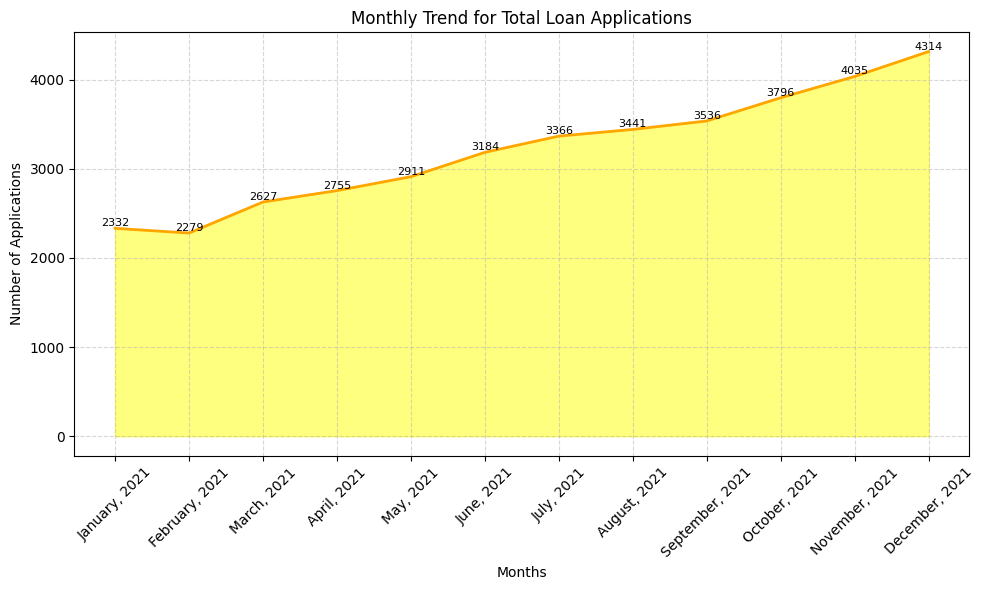

In [21]:
# 1. Grouping and Counting
monthly_application = (
    df.groupby(df['issue_date'].dt.to_period('M')) # Groups chronologically by month/year
      .size()                                      # Efficient way to count rows
      .reset_index(name='loan_applications_count')
)

# 2. Format the labels for the plot after sorting
monthly_application['month_name'] = monthly_application['issue_date'].dt.strftime('%B, %Y')

# 3. Plotting
plt.figure(figsize=(10, 6))

plt.fill_between(monthly_application['month_name'], 
                 monthly_application['loan_applications_count'], 
                 color='yellow', alpha=0.5)

plt.plot(monthly_application['month_name'], 
         monthly_application['loan_applications_count'], 
         color='orange', linewidth=2)

# 4. Data Labels
for i, row in monthly_application.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, 
             f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=8, color='black')

plt.title('Monthly Trend for Total Loan Applications')
plt.xlabel('Months')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()

plt.show()

#### Monthly Trend by Issue date for TOTAL FUNDED AMOUNT

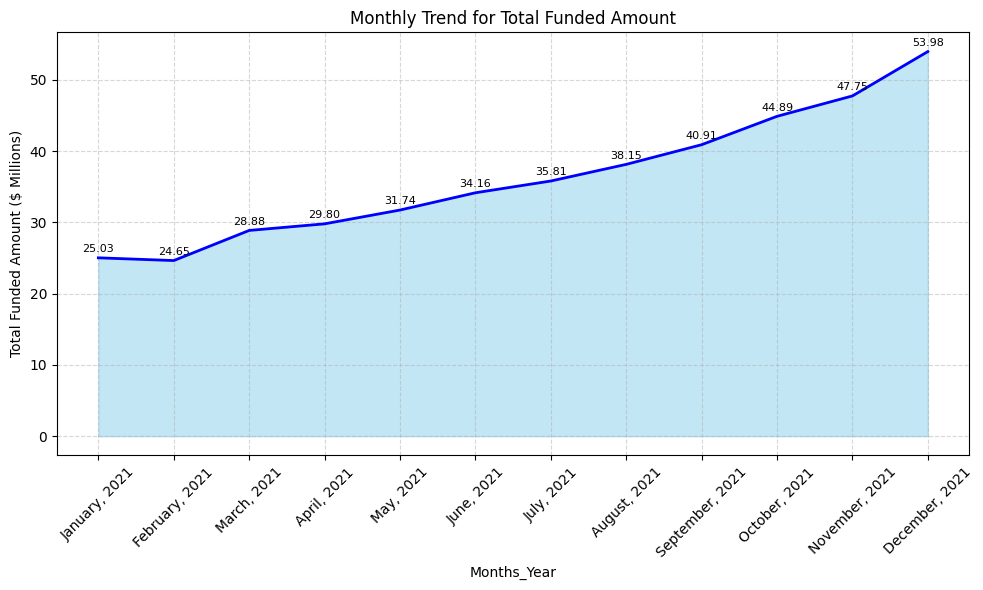

In [22]:
# 1. Grouping and Counting
monthly_funded = (
    df.groupby(df['issue_date'].dt.to_period('M'))
      ['loan_amount']
      .sum()
      .divide(1000000)
      .reset_index(name='total_funded_amount')
)

# 2. Format the labels for the plot after sorting
monthly_funded['loan_amount'] = monthly_funded['issue_date'].dt.strftime('%B, %Y')

# 3. Plotting
plt.figure(figsize=(10,6))

plt.fill_between(monthly_funded['loan_amount'], 
                 monthly_funded['total_funded_amount'], 
                 color='skyblue', alpha=0.5)

plt.plot(monthly_funded['loan_amount'], 
         monthly_funded['total_funded_amount'], 
         color='blue', linewidth=2)

# 4. Data Labels
for i, row in monthly_funded.iterrows():

    plt.text(i, row['total_funded_amount'] + 0.5, 
             f"{row['total_funded_amount']:.2f}",
             ha='center', va='bottom', fontsize=8, color='black')

plt.title('Monthly Trend for Total Funded Amount')
plt.xlabel('Months_Year')
plt.ylabel('Total Funded Amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

#### Monthly Trend by Issue date for TOTAL AMOUNT RECEIVED

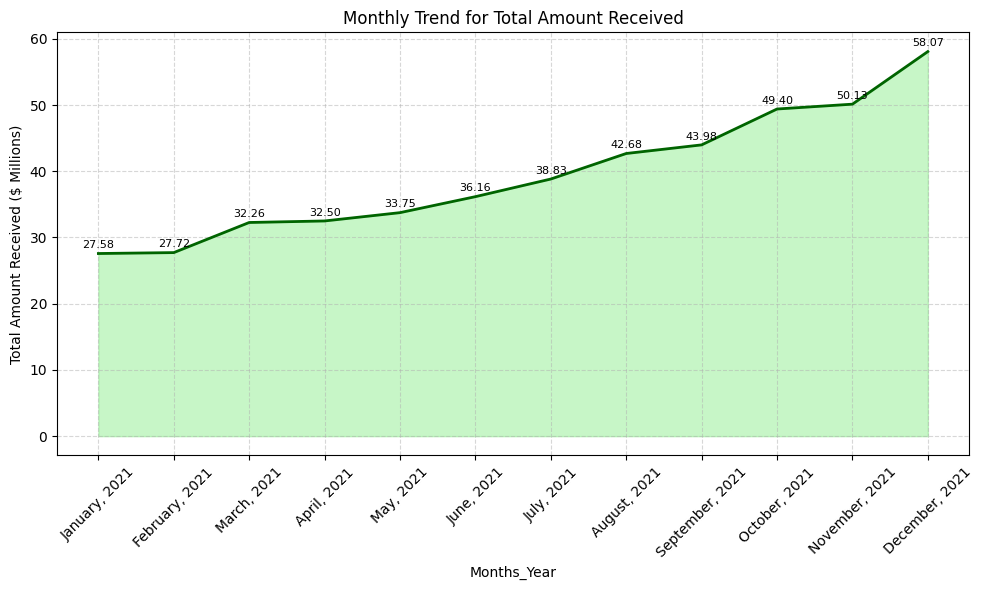

In [23]:
# 1. Grouping and Counting
monthly_amount_received = (
    df.groupby(df['issue_date'].dt.to_period('M'))
      ['total_payment']
      .sum()
      .divide(1000000)
      .reset_index(name='total_amount_received')
)

# 2. Format the labels for the plot after sorting
monthly_amount_received['total_payment'] = monthly_amount_received['issue_date'].dt.strftime('%B, %Y')

# 3. Plotting
plt.figure(figsize=(10,6))

plt.fill_between(monthly_amount_received['total_payment'], 
                 monthly_amount_received['total_amount_received'], 
                 color='lightgreen', alpha=0.5)

plt.plot(monthly_amount_received['total_payment'], 
         monthly_amount_received['total_amount_received'], 
         color='darkgreen', linewidth=2)

# 4. Data Labels
for i, row in monthly_amount_received.iterrows():

    plt.text(i, row['total_amount_received'] + 0.5, 
             f"{row['total_amount_received']:.2f}",
             ha='center', va='bottom', fontsize=8, color='black')

plt.title('Monthly Trend for Total Amount Received')
plt.xlabel('Months_Year')
plt.ylabel('Total Amount Received ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

#### REGION ANALYSIS BY STATE FOR TOTAL LOAN APPLICATION

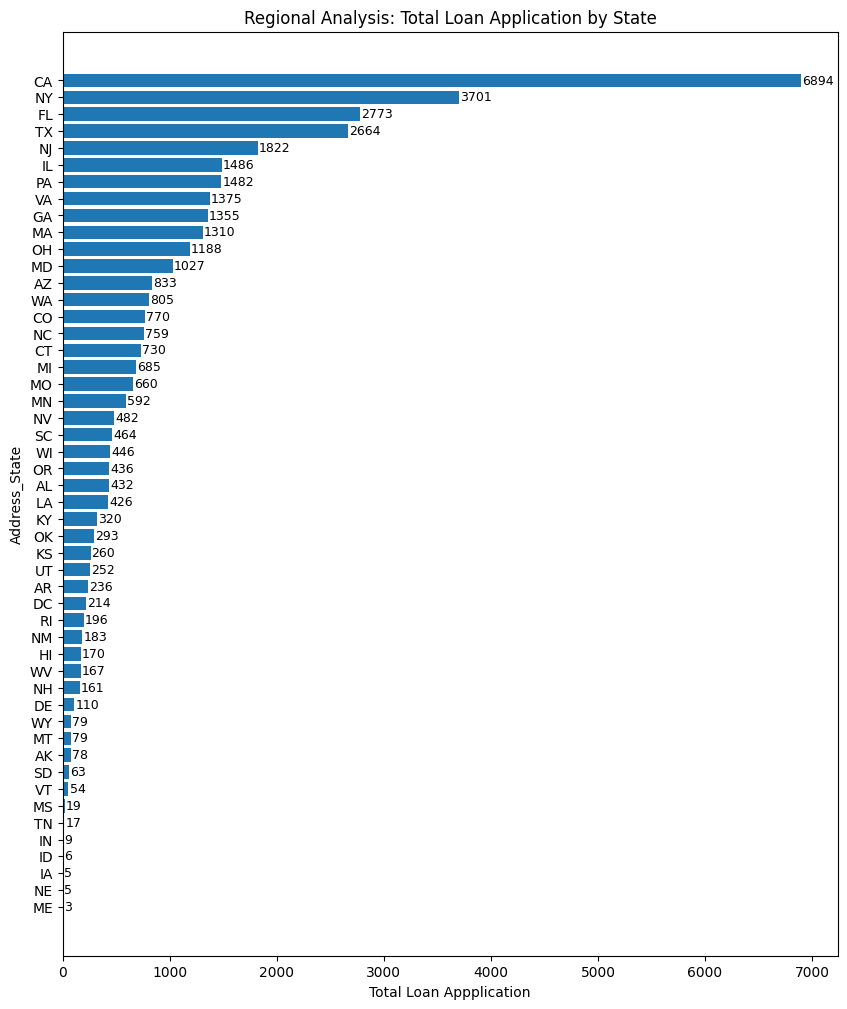

In [24]:
state_loan_app = df.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10, 12))
bars = plt.barh(state_loan_app.index, state_loan_app.values)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, (int(width)), va='center', fontsize=9)

plt.title("Regional Analysis: Total Loan Application by State")
plt.xlabel("Total Loan Appplication")
plt.ylabel("Address_State")
plt.show()

#### REGION ANALYSIS BY STATE FOR TOTAL FUNDED AMOUNT

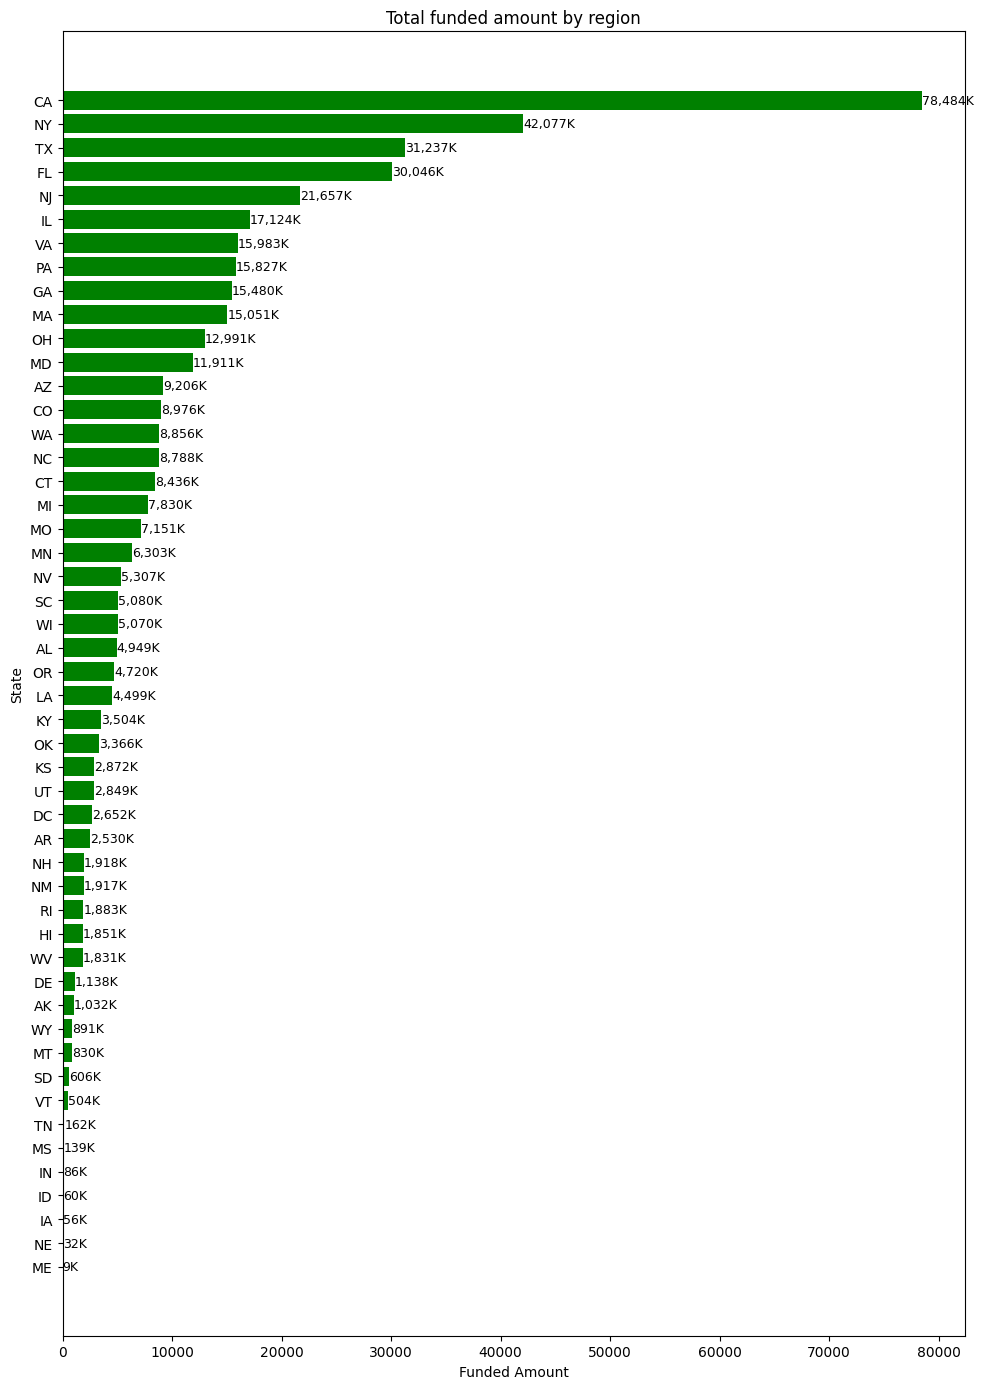

In [25]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending = True)
state_funding_thousands = state_funding/1000

plt.figure(figsize=(10,14))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color = 'green')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() /2,
             f'{width:,.0f}K', va = 'center', fontsize = 9)

plt.title('Total funded amount by region')
plt.xlabel("Funded Amount")
plt.ylabel('State')
plt.tight_layout()
plt.show()

### REGIONAL ANALYSIS BY STATE FOR TOTAL AMOUNT RECEIVED

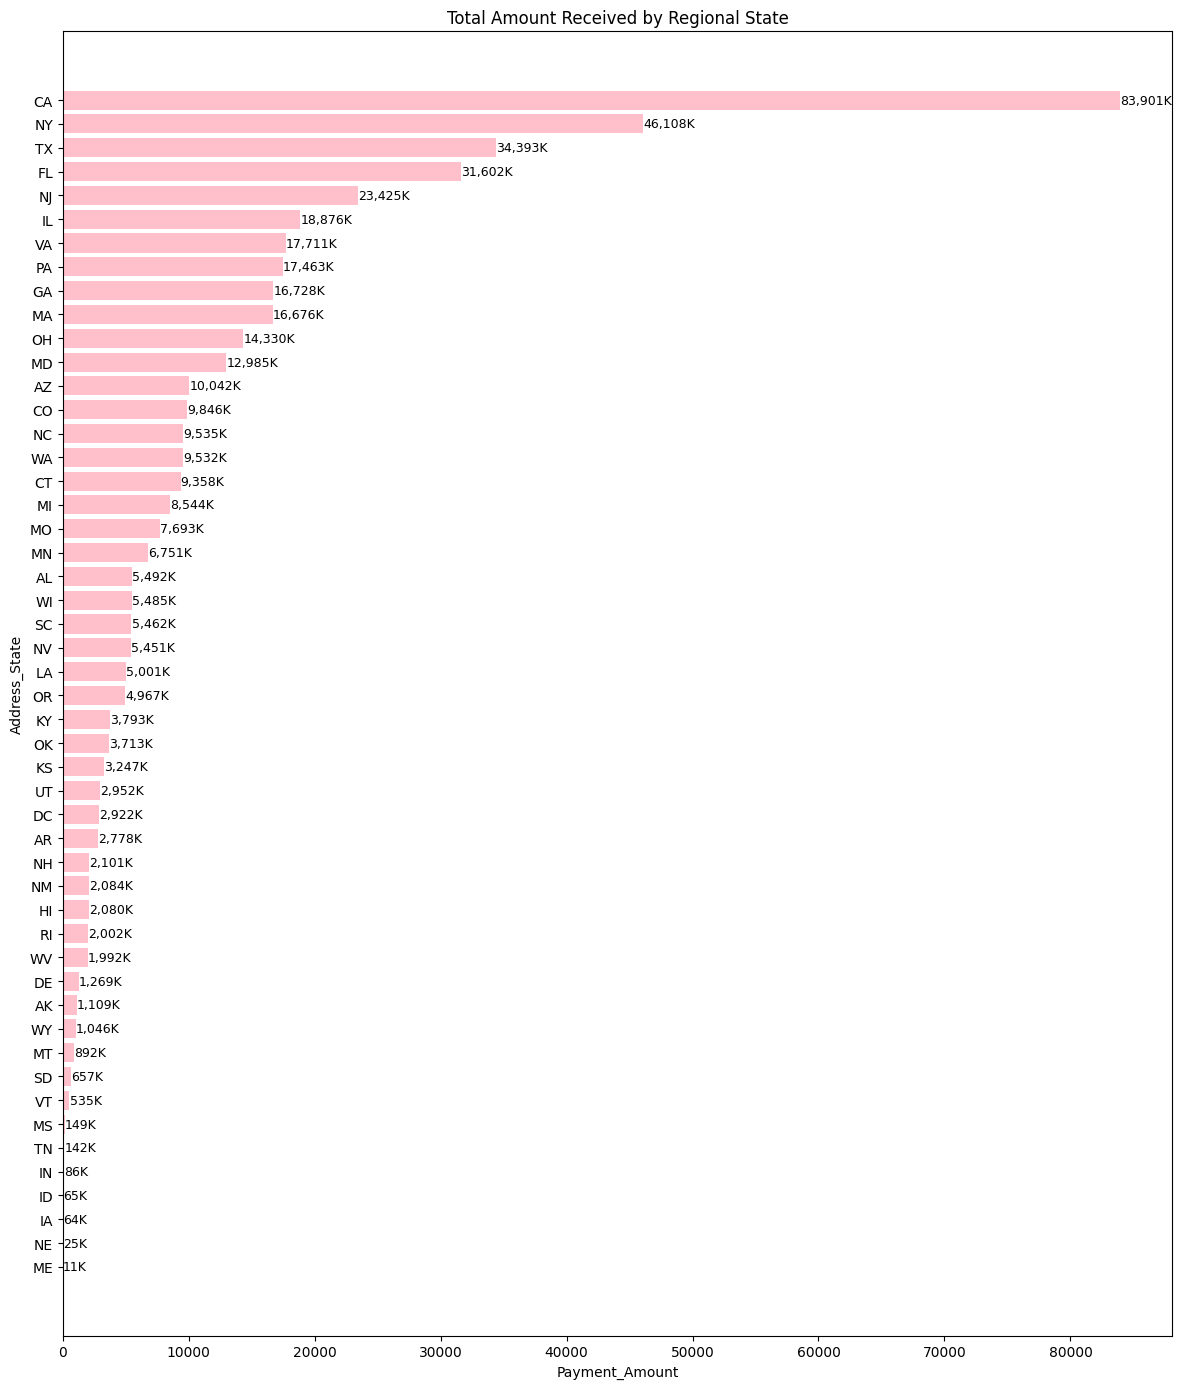

In [26]:
loan_amt_rec = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
loan_amt_rec_thou = loan_amt_rec/1000


plt.figure(figsize=(12,14))
bars = plt.barh(loan_amt_rec_thou.index, loan_amt_rec_thou.values, color='pink')

for bar in bars:
    width= bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() /2, f'{width:,.0f}K', va='center', fontsize=9)

plt.title('Total Amount Received by Regional State')
plt.xlabel('Payment_Amount')
plt.ylabel('Address_State')
plt.tight_layout()
plt.show()

### LOAN TERM ANALYSIS FOR TOTAL LOAN APPLICATION

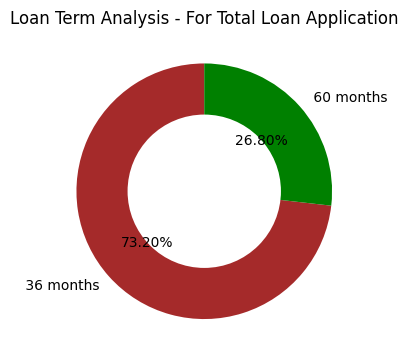

In [27]:
loan_term_counts = df.groupby('term')['id'].count()

labels = loan_term_counts.index
sizes = loan_term_counts.values

plt.figure(figsize=(4,5))

wedges, text, autotexts = plt.pie(sizes, labels = labels, autopct = '%0.2f%%', startangle = 90, colors = ['brown', 'green'])

#Center circle
center_circle = plt.Circle((0,0), 0.6, fc = 'white')
plt.gca().add_artist(center_circle)

plt.title("Loan Term Analysis - For Total Loan Application")
plt.tight_layout()
plt.show()

###  LOAN TERM ANALYSIS - FOR TOTAL FUNDED AMOUNT

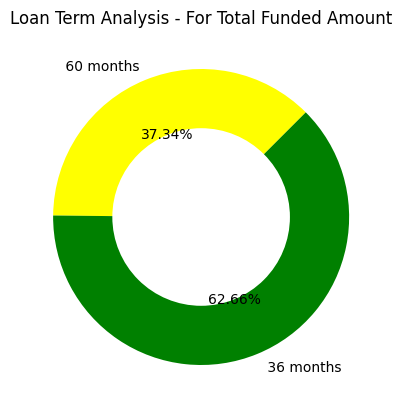

In [28]:
loan_term_tot_funded_amt = df.groupby('term')['loan_amount'].sum().sort_values(ascending = True)

labels = loan_term_tot_funded_amt.index
sizes = loan_term_tot_funded_amt.values

plt.figure(figsize=(4,5))

wedges, text, autotexts = plt.pie(sizes, labels = labels, autopct = '%1.2f%%', startangle = 45, colors = ['yellow', 'green'])

#Center circle
center_circle = plt.Circle((0,0), 0.6, fc = 'white')
plt.gca().add_artist(center_circle)

plt.title("Loan Term Analysis - For Total Funded Amount")
plt.tight_layout()
plt.show()

### LOAN TERM ANALYSIS - FOR TOTAL AMOUNT RECEIVED

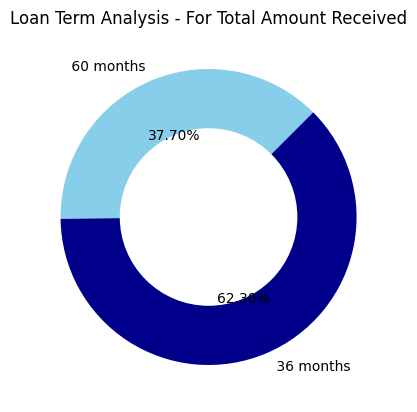

In [29]:
loan_term_tot_amt_rec = df.groupby('term')['total_payment'].sum().sort_values(ascending = True)

labels = loan_term_tot_amt_rec.index
sizes = loan_term_tot_amt_rec.values

plt.figure(figsize=(4,5))

wedges, text, autotexts = plt.pie(sizes, labels = labels, autopct = '%1.2f%%', startangle = 45, colors = ['skyblue', 'darkblue'])

#Center circle
center_circle = plt.Circle((0,0), 0.6, fc = 'white')
plt.gca().add_artist(center_circle)

plt.title("Loan Term Analysis - For Total Amount Received")
plt.tight_layout()
plt.show()

### EMPLOYEE TERM ANALYSIS - TOTAL LOAN APPLICATION

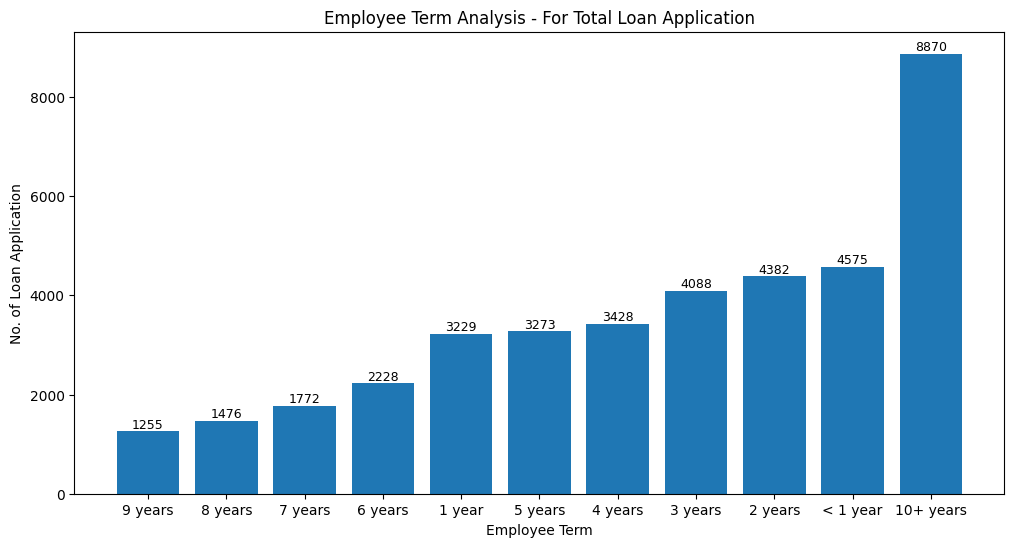

In [30]:
emp_loan_app = df.groupby('emp_length')['id'].count().sort_values(ascending = True)

plt.figure(figsize=(12,6))
bars = plt.bar(emp_loan_app.index, emp_loan_app.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha = 'center', va = 'bottom', fontsize = 9)

plt.title("Employee Term Analysis - For Total Loan Application")
plt.xlabel("Employee Term")
plt.ylabel("No. of Loan Application")

plt.show()

### EMPLOYEE TERM ANALYSIS - FOR TOTAL FUNDED AMOUNT

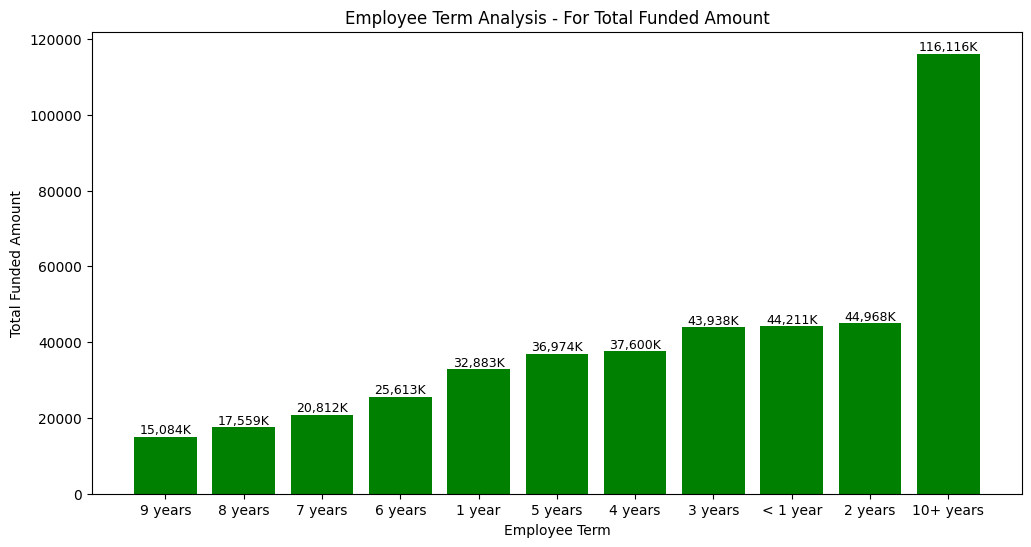

In [31]:
emp_loan_app_fund_amt = df.groupby('emp_length')['loan_amount'].sum().sort_values(ascending = True)
emp_loan_app_fund_amt_thousand = emp_loan_app_fund_amt/1000

plt.figure(figsize=(12,6))
bars = plt.bar(emp_loan_app_fund_amt_thousand.index, emp_loan_app_fund_amt_thousand.values, color = 'green')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:,.0f}K', ha = 'center', va = 'bottom', fontsize = 9, color = 'black')

plt.title("Employee Term Analysis - For Total Funded Amount")
plt.xlabel("Employee Term")
plt.ylabel("Total Funded Amount")

plt.show()

### EMPLOYEE TERM ANALYSIS - FOR TOTAL AMOUNT RECEIVED

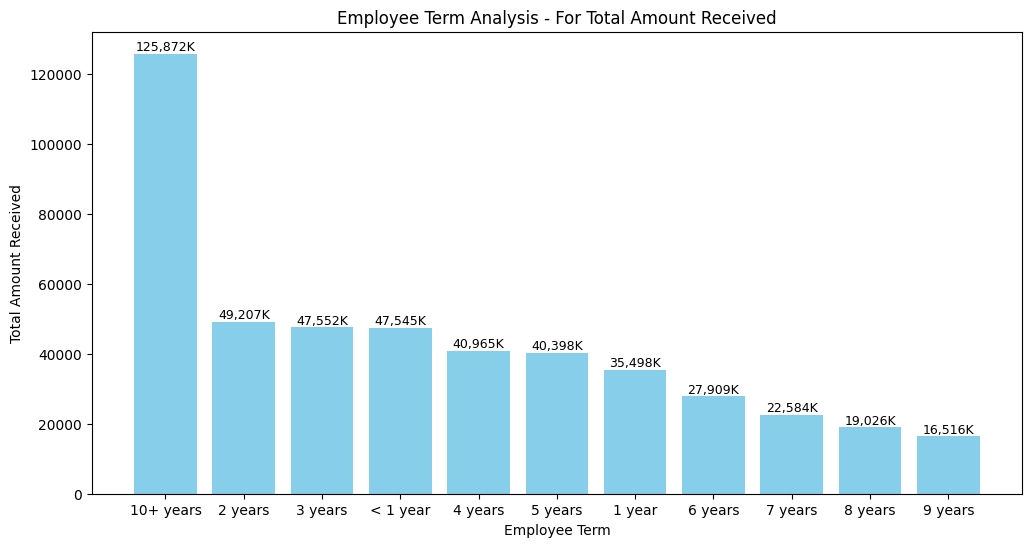

In [32]:
emp_len_amt_rec = df.groupby('emp_length')['total_payment'].sum().sort_values(ascending = False)
emp_len_amt_rec_thousand = emp_len_amt_rec/1000

plt.figure(figsize=(12,6))
bars = plt.bar(emp_len_amt_rec_thousand.index, emp_len_amt_rec_thousand.values, color = 'skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:,.0f}K', ha = 'center', va = 'bottom', fontsize = 9, color = 'black')

plt.title("Employee Term Analysis - For Total Amount Received")
plt.xlabel("Employee Term")
plt.ylabel("Total Amount Received")

plt.show()

### LOAN PURPOSE BREAKDOWN - FOR TOTAL LOAN APPLICATION

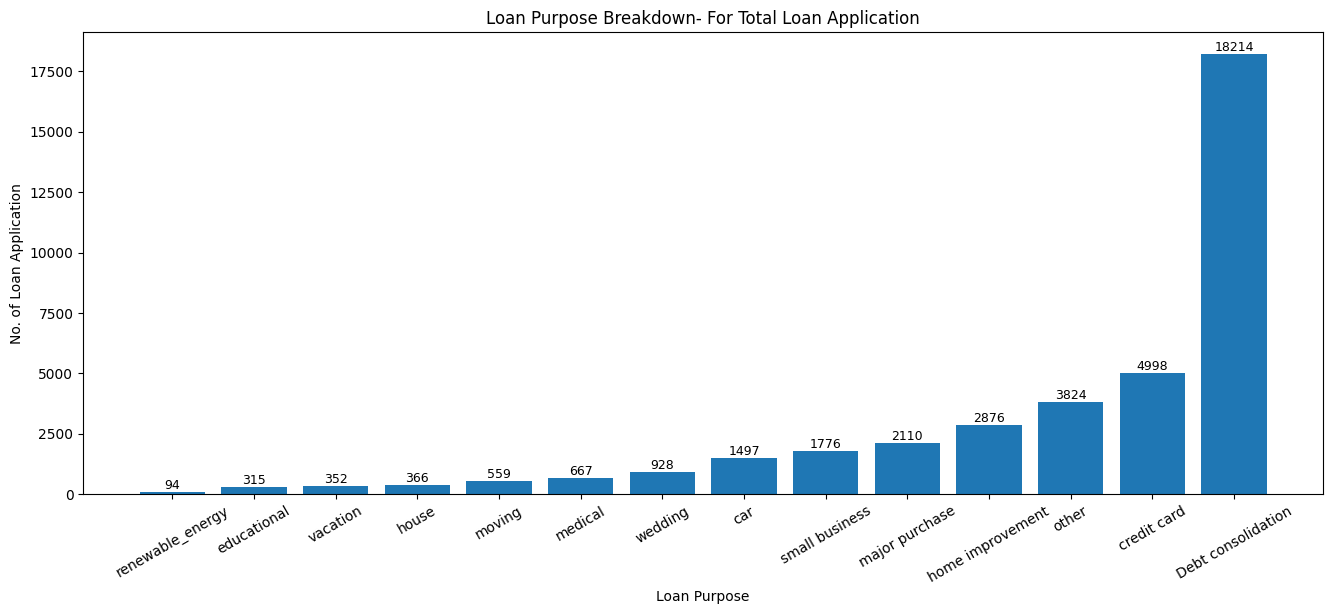

In [33]:
loan_purpose_loan_app = df.groupby('purpose')['id'].count().sort_values(ascending = True)

plt.figure(figsize=(16,6))
bars = plt.bar(loan_purpose_loan_app.index, loan_purpose_loan_app.values)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha = 'center', va = 'bottom', fontsize = 9)

plt.title("Loan Purpose Breakdown- For Total Loan Application")
plt.xlabel("Loan Purpose")
plt.xticks(rotation = 30)
plt.ylabel("No. of Loan Application")

plt.show()

### LOAN PURPOSE BREAKDOWN - TOTAL FUNDED AMOUNT

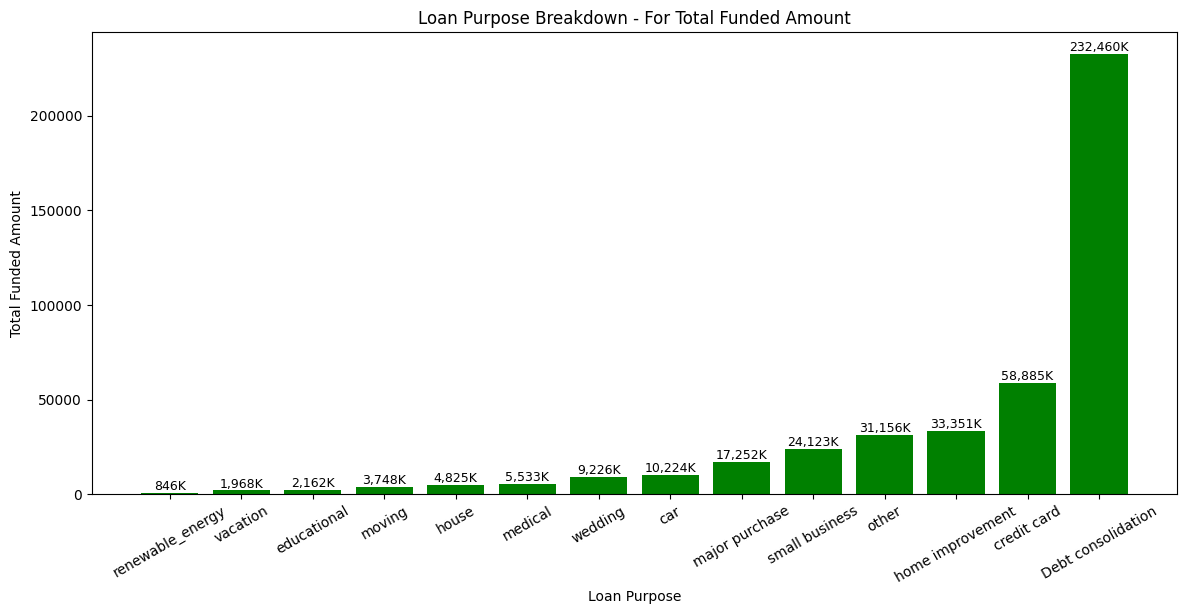

In [34]:
loan_purpose_fund_amt = df.groupby('purpose')['loan_amount'].sum().sort_values(ascending = True)
loan_purpose_fund_amt_thousand = loan_purpose_fund_amt/1000

plt.figure(figsize=(14,6))
bars = plt.bar(loan_purpose_fund_amt_thousand.index, loan_purpose_fund_amt_thousand.values, color = 'green')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:,.0f}K', ha = 'center', va = 'bottom', fontsize = 9, color = 'black')

plt.title("Loan Purpose Breakdown - For Total Funded Amount")
plt.xlabel("Loan Purpose")
plt.xticks(rotation = 30)
plt.ylabel("Total Funded Amount")

plt.show()

### LOAN PURPOSE BREAKDOWN - FOR TOTAL AMOUNT RECEIVED

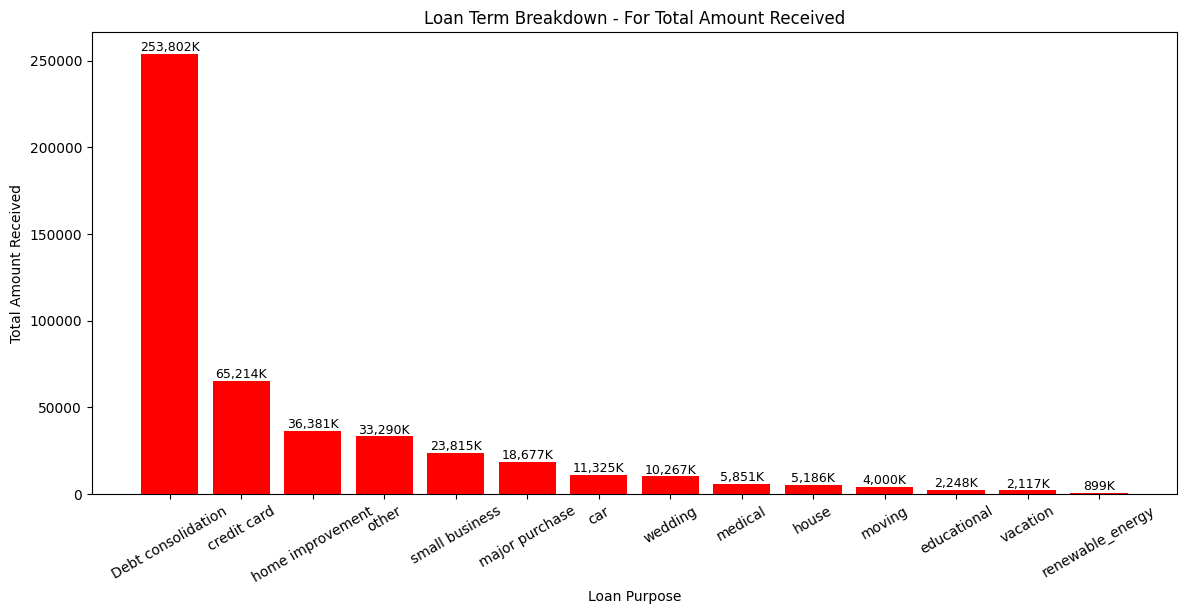

In [35]:
loan_purpose_amt_rec = df.groupby('purpose')['total_payment'].sum().sort_values(ascending = False)
loan_purpose_amt_rec_thousand = loan_purpose_amt_rec/1000

plt.figure(figsize=(14, 6))
bars = plt.bar(loan_purpose_amt_rec_thousand.index, loan_purpose_amt_rec_thousand.values, color = 'red')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:,.0f}K', ha = 'center', va = 'bottom', fontsize = 9, color = 'black')

plt.title("Loan Term Breakdown - For Total Amount Received")
plt.xlabel("Loan Purpose")
plt.xticks(rotation = 30)
plt.ylabel("Total Amount Received")

plt.show()

### HOME OWNERSHIP ANALYSIS - FOR TOTAL LOAN APPLICATION

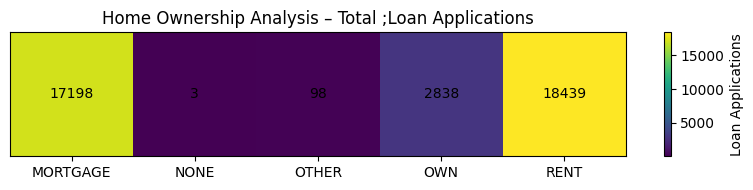

In [41]:
home_apps = df.groupby('home_ownership')['id'].count()


plt.figure(figsize=(8,2))

plt.imshow(data, aspect='auto')

plt.xticks(range(len(home_apps.index)), home_apps.index)
plt.yticks([])

# Add values on cells
for i, val in enumerate(home_apps.values):
    plt.text(i, 0, int(val), ha='center', va='center')

plt.title("Home Ownership Analysis – Total ;Loan Applications")
plt.colorbar(label='Loan Applications')

plt.tight_layout()
plt.show()

### HOME OWNERSHIP ANALYSIS - FOR TOTAL FUNDED AMOUNT

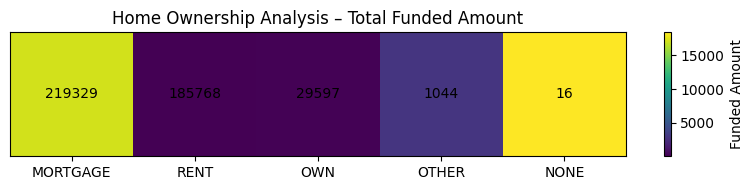

In [39]:
home_fund_amt = df.groupby('home_ownership')['loan_amount'].sum().sort_values(ascending = False)
home_fun_amt_thousand = home_fund_amt/1000

plt.figure(figsize=(8,2))

plt.imshow(data, aspect='auto')

plt.xticks(range(len(home_fun_amt_thousand.index)), home_fun_amt_thousand.index)
plt.yticks([])

# Add values on cells
for i, val in enumerate(home_fun_amt_thousand.values):
    plt.text(i, 0, int(val), ha='center', va='center')

plt.title("Home Ownership Analysis – Total Funded Amount")
plt.colorbar(label='Funded Amount')

plt.tight_layout()
plt.show()


### HOME OWNERSHIP ANALYSIS - TOTAL AMOUNT RECEIVED

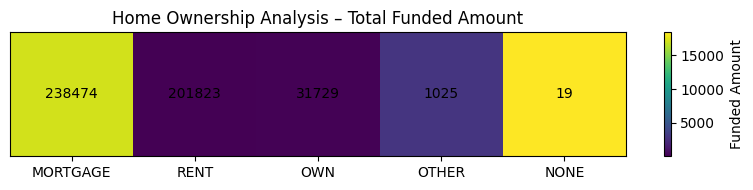

In [45]:
home_fund_amt_rec = df.groupby('home_ownership')['total_payment'].sum().sort_values(ascending = False)
home_fund_amt_rec_thousand = home_fund_amt_rec/1000

plt.figure(figsize=(8,2))

plt.imshow(data, aspect='auto')

plt.xticks(range(len(home_fund_amt_rec_thousand.index)), home_fund_amt_rec_thousand.index)
plt.yticks([])

# Add values on cells
for i, val in enumerate(home_fund_amt_rec_thousand.values):
    plt.text(i, 0, int(val), ha='center', va='center')

plt.title("Home Ownership Analysis – Total Funded Amount")
plt.colorbar(label='Funded Amount')

plt.tight_layout()
plt.show()
